<a href="https://colab.research.google.com/github/hasibzunair/ericsson-upskill-tutorials/blob/main/tensorflow_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building machine learning models using TensorFlow

**Author:** [Hasib Zunair](https://hasibzunair.github.io/)<br>
**Date created:** 2021/10/01<br>
**Last modified:** 2022/02/01<br>

**Description:** This tutorial introduces TensorFlow, a Python based machine learning (ML) library. It begins by importing the main Python modules for building machine learning models. Then it implements the simplest possible neural network to solve a function $y=2x-1$. Next, it shows how to build and train convolutional neural networks for image classification to identify cats and dogs using unstructured datasets (e.g. images). Finally, it shows how to build and train a reconstruction convolutional autoencoder to detect anomalies in time series data using structured/tabular datasets (e.g. CSV files). After being introduced to solve different tasks using neural networks implemented in TensorFlow, participants apply what they have learned on their own datasets and tasks.

**Learning Objectives:**
At the end of this tutorial on TensorFlow, participants will be able to:

* describe how to import the main Python modules for building ML models
* implement neural networks in TensorFlow
* use unstructured as well as structured datasets with TensorFlow
* apply neural networks to classification and anomaly detection tasks

# Imports 

Let's start with our imports. Here we are importing TensorFlow and calling it tf for easy reference.

Then we import a library called numpy, which helps us to represent our data as lists easily and [quickly](https://towardsdatascience.com/how-fast-numpy-really-is-e9111df44347).

The framework for defining a neural network as a set of Sequential layers is called keras, so we import that too.

In [1]:
# Main libraries
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Helper libraries
import os
import pandas as pd
import matplotlib.pyplot as plt # For plotting graphs

# 1. Hello World of Machine Learning with Neural Networks

Like every first app you should start with something super simple that shows the overall scaffolding for how your code works.

In the case of creating neural networks, the sample we use is one where it learns the relationship between two numbers. So, for example, if you were writing code for a function like this, you already know the 'rules' —

```python
float hw_function(float x){
    float y = (2 * x) - 1;
    return y;
}
```

So how would you train a neural network to do the equivalent task? Using data! By feeding it with a set of Xs, and a set of Ys, it should be able to figure out the relationship between them.

This is obviously a very different paradigm than what you might be used to, so let's step through it piece by piece.

## Define and Compile the Neural Network

Next we will create the simplest possible neural network. It has 1 layer, and that layer has 1 neuron, and the input shape to it is just 1 value.

In [2]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

Now we compile our Neural Network. When we do so, we have to specify 2 functions, a **loss** and an **optimizer**.

If you've seen lots of math for machine learning, here's where it's usually used, but in this case it's nicely encapsulated in functions for you. But what happens here — let's explain...

We know that in our function, the relationship between the numbers is $y=2x-1$.

When the computer is trying to 'learn' that, it makes a guess...maybe $y=10x+10$. The **loss** function measures the guessed answers against the known correct answers and measures how well or how badly it did.

It then uses the **optimizer** function to make another guess. Based on how the loss function went, it will try to minimize the loss. At that point maybe it will come up with somehting like $y=5x+5$, which, while still pretty bad, is closer to the correct result (i.e. the loss is lower)

It will repeat this for the number of **epochs** which you will see shortly. But first, here's how we tell it to use **mean squared error** for the loss and **stochastic gradient descent** for the optimizer. You don't need to understand the math for these yet, but you can see that they work! :)

Over time you will learn the different and appropriate loss and optimizer functions for different scenarios.

In [3]:
model.compile(optimizer='sgd', loss='mean_squared_error')

## Providing the Data

Next up we'll feed in some data. In this case we are taking 6 xs and 6ys. You can see that the relationship between these is that $y=2x-1$, so where $x = -1$, $y=-3$ yada yada yada.

A python library called 'Numpy' provides lots of array type data structures that are a defacto standard way of doing it. We declare that we want to use these by specifying the values as an ```np.array[]```

In [4]:
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

## Training the Neural Network

The process of training the neural network, where it 'learns' the relationship between the `xs` and `ys` is in the `model.fit` call. This is where it will go through the loop we spoke about above, *making a guess*, *measuring how good or bad it is* (aka the loss), *using the opimizer to make another guess* etc. It will do it for the number of **epochs** you specify. When you run this code, you'll see the loss on the right hand side.

In [5]:
model.fit(xs, ys, epochs=200)

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 1.0109
Epoch 2/200
1/1 [==============================] - 0s 8ms/step - loss: 0.9226
Epoch 3/200
1/1 [==============================] - 0s 11ms/step - loss: 0.8505
Epoch 4/200
1/1 [==============================] - 0s 10ms/step - loss: 0.7912
Epoch 5/200
1/1 [==============================] - 0s 15ms/step - loss: 0.7420
Epoch 6/200
1/1 [==============================] - 0s 17ms/step - loss: 0.7009
Epoch 7/200
1/1 [==============================] - 0s 12ms/step - loss: 0.6662
Epoch 8/200
1/1 [==============================] - 0s 11ms/step - loss: 0.6365
Epoch 9/200
1/1 [==============================] - 0s 6ms/step - loss: 0.6108
Epoch 10/200
1/1 [==============================] - 0s 5ms/step - loss: 0.5883
Epoch 11/200
1/1 [==============================] - 0s 6ms/step - loss: 0.5684
Epoch 12/200
1/1 [==============================] - 0s 9ms/step - loss: 0.5506
Epoch 13/200
1/1 [==============================] - 0s 7

## Plot the loss

We plot the loss at each epoch during the `model.fit` call.

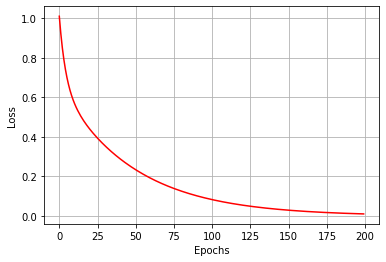

In [6]:
# Get loss and epochs
loss = model.history.history['loss']
epochs = range(len(loss))

# Plot loss versus epochs
plt.plot(epochs, loss, 'r')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.grid(True)

# Show figure
plt.show()

Ok, now you have a model that has been trained to learn the relationshop between X and Y. You can use the `model.predict` method to have it figure out the Y for a previously unknown X. So, for example, if $X = 10$, what do you think Y will be? Take a guess before you run this code:

In [7]:
print(model.predict([10.0]))

[[18.69935]]



You might have thought 19, right? But it ended up being a little under. Why do you think that is?

Remember that neural networks deal with **probabilities**, so given the data that we fed the neural network with, it calculated that there is a very high probability that the relationship between X and Y is $Y=2X-1$, but with only 6 data points we can't know for sure. As a result, the result for 10 is very close to 19, but not necessarily 19.

As you work with neural networks, you'll see this pattern recurring. You will almost always deal with probabilities, not certainties, and will do a little bit of coding to figure out what the result is based on the probabilities, particularly when it comes to classification.

# 2. Image classification

This section shows how to do image classification to identify whether the image is of a cat for a dog (bite!). 

It uses an unstructured dataset (e.g. only images) to train the model.

## Load data

Download and `unzip` the raw data.

In [8]:
if not os.path.exists("kagglecatsanddogs_3367a.zip"):
  !curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
  !unzip -q kagglecatsanddogs_3367a.zip
  !ls

else:
  print("Data exists.")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  786M  100  786M    0     0  68.0M      0  0:00:11  0:00:11 --:--:-- 68.4M
 kagglecatsanddogs_3367a.zip   PetImages        sample_data
'MSR-LA - 3467.docx'	      'readme[1].txt'


Let's see what the folder `PetImages` has.

In [9]:
!ls PetImages

Cat  Dog


## Filter out corrupted images

When working with lots of real-world image data, corrupted images are a common occurence. Let's filter out badly-encoded images that do not feature the string "JFIF" in their header.

In [10]:
import os

num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("PetImages", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 1590 images


## Buiild data loader

In [11]:
image_size = (180, 180)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 23410 files belonging to 2 classes.
Using 18728 files for training.
Found 23410 files belonging to 2 classes.
Using 4682 files for validation.


## Visualize the data

Here are the first 9 images in the training dataset. As you can see, label 1 is "dog" and label 0 is "cat".

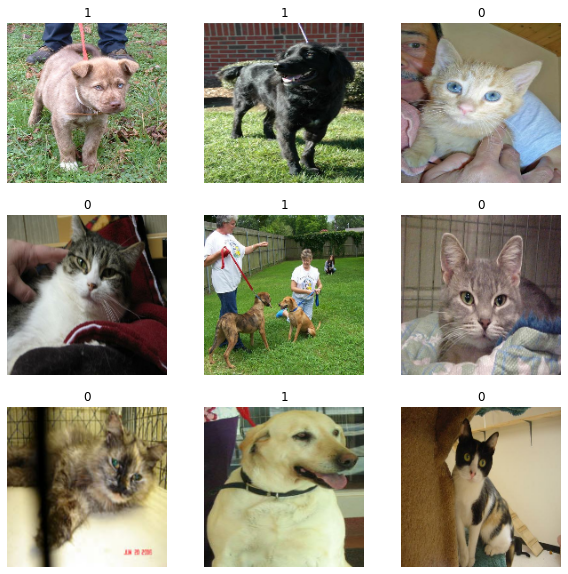

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

## Make dataloader faster!

In [13]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

## Build a model

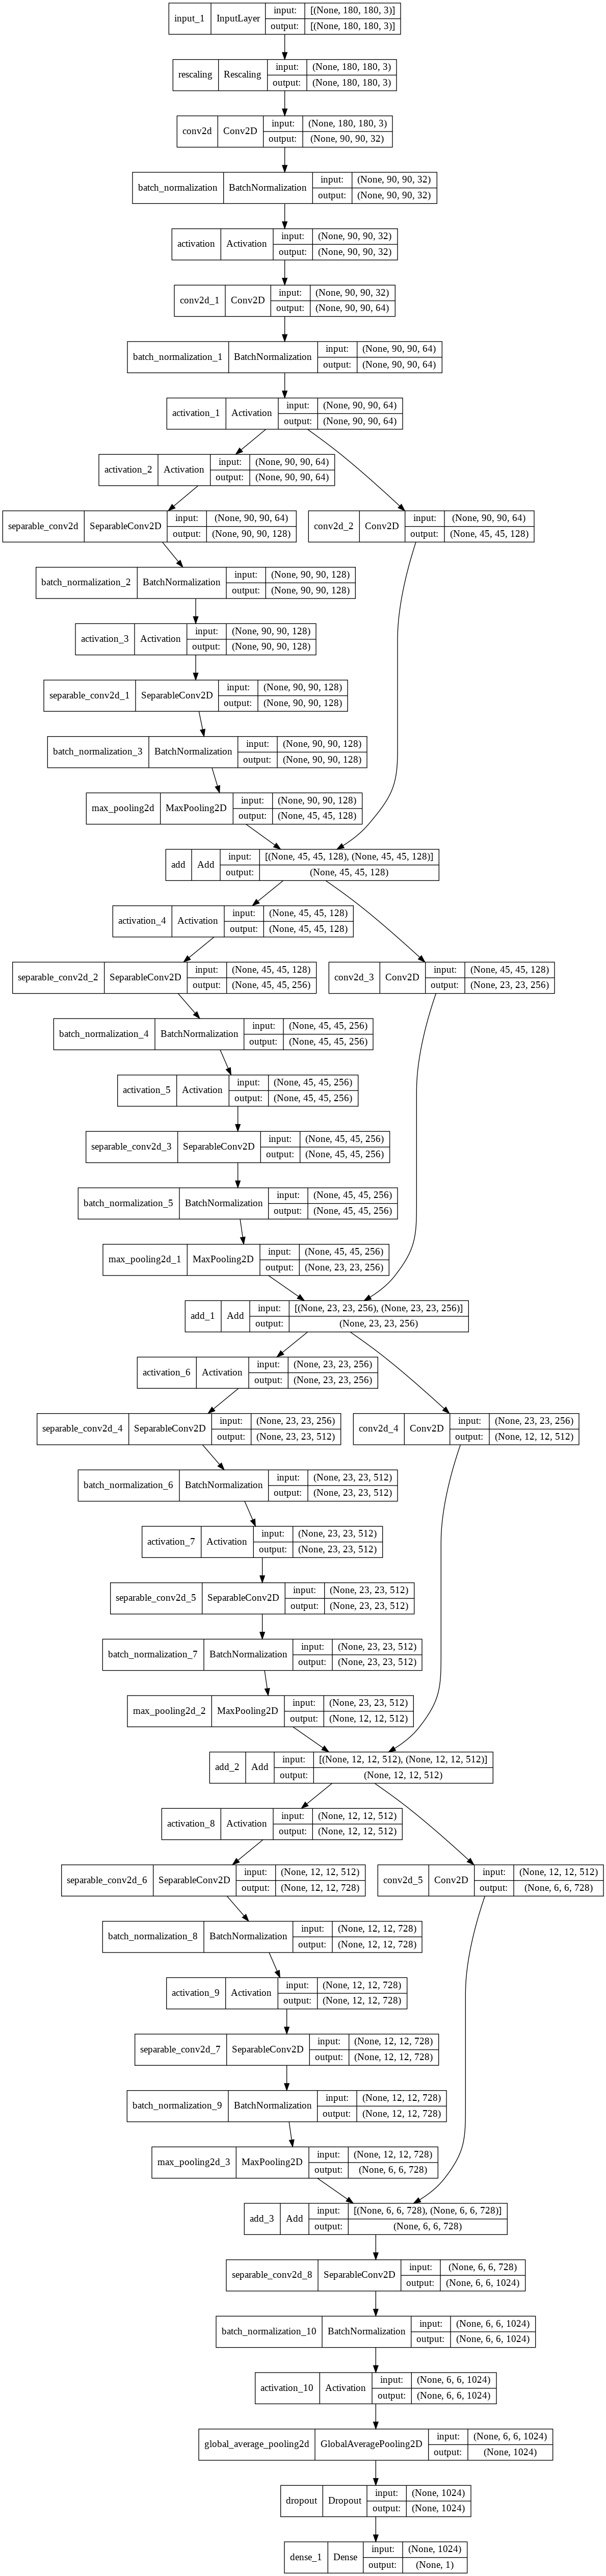

In [14]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [128, 256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = None
model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

## Train model

In [15]:
epochs = 3

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"], # new
)
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

Epoch 1/3
586/586 [==============================] - ETA: 0s - loss: 0.5689 - accuracy: 0.7067

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


586/586 [==============================] - 299s 489ms/step - loss: 0.5689 - accuracy: 0.7067 - val_loss: 0.6920 - val_accuracy: 0.6130
Epoch 2/3
586/586 [==============================] - 286s 487ms/step - loss: 0.3620 - accuracy: 0.8402 - val_loss: 0.3294 - val_accuracy: 0.8588
Epoch 3/3
586/586 [==============================] - 286s 487ms/step - loss: 0.2532 - accuracy: 0.8932 - val_loss: 1.2183 - val_accuracy: 0.6151


We get to ~80% validation accuracy after training for just 3 epochs on the full dataset. Try more epochs for better results.

## Run inference on new data

In [16]:
img = keras.preprocessing.image.load_img(
    "PetImages/Cat/6779.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = predictions[0]
print(
    "This image is %.2f percent cat and %.2f percent dog."
    % (100 * (1 - score), 100 * score)
)

This image is 98.66 percent cat and 1.34 percent dog.


# 3. Anomaly detection

This section shows how to detect anomalies in a timeseries using an Autoencoder.

It uses a structured dataset (e.g. CSV files) to train the model.

## Load data

The dataset provides artifical timeseries data containing labeled anomalous periods of behavior. Data are ordered, timestamped, single-valued metrics.

We will use the art_daily_small_noise.csv file for training and the art_daily_jumpsup.csv file for testing.


In [17]:
master_url_root = "https://raw.githubusercontent.com/numenta/NAB/master/data/"

df_small_noise_url_suffix = "artificialNoAnomaly/art_daily_small_noise.csv"
df_small_noise_url = master_url_root + df_small_noise_url_suffix
df_small_noise = pd.read_csv(
    df_small_noise_url, parse_dates=True, index_col="timestamp"
)

df_daily_jumpsup_url_suffix = "artificialWithAnomaly/art_daily_jumpsup.csv"
df_daily_jumpsup_url = master_url_root + df_daily_jumpsup_url_suffix
df_daily_jumpsup = pd.read_csv(
    df_daily_jumpsup_url, parse_dates=True, index_col="timestamp"
)

In [18]:
print(df_small_noise.head())

print(df_daily_jumpsup.head())

                         value
timestamp                     
2014-04-01 00:00:00  18.324919
2014-04-01 00:05:00  21.970327
2014-04-01 00:10:00  18.624806
2014-04-01 00:15:00  21.953684
2014-04-01 00:20:00  21.909120
                         value
timestamp                     
2014-04-01 00:00:00  19.761252
2014-04-01 00:05:00  20.500833
2014-04-01 00:10:00  19.961641
2014-04-01 00:15:00  21.490266
2014-04-01 00:20:00  20.187739


## Visualize the data

This is timeseries data WITHOUT anomalies.


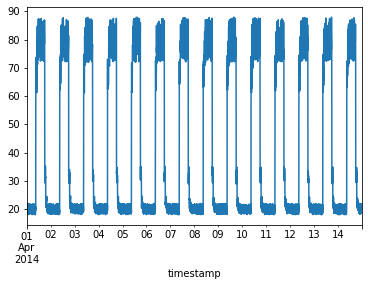

In [19]:
fig, ax = plt.subplots()
df_small_noise.plot(legend=False, ax=ax)
plt.show()

Timeseries data with anomalies
We will use the following data for testing and see if the sudden jump up in the data is detected as an anomaly.

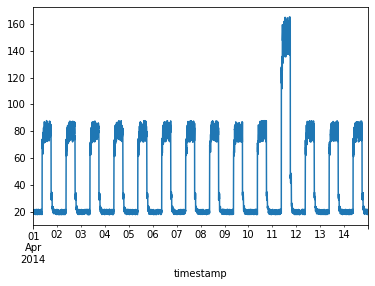

In [20]:
fig, ax = plt.subplots()
df_daily_jumpsup.plot(legend=False, ax=ax)
plt.show()

### Preprocess data

Get data values from the training timeseries data file and normalize the value data. We have a value for every 5 mins for 14 days.

* `24 * 60 / 5 = 288` timesteps per day
* `288 * 14 = 4032` data points in total

In [21]:
# Normalize and save the mean and std we get,
# for normalizing test data.
training_mean = df_small_noise.mean()
training_std = df_small_noise.std()
df_training_value = (df_small_noise - training_mean) / training_std
print("Number of training samples:", len(df_training_value))

Number of training samples: 4032


## Create sequences

In [22]:
TIME_STEPS = 288

# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


x_train = create_sequences(df_training_value.values)
print("Training input shape: ", x_train.shape)

Training input shape:  (3745, 288, 1)


## Build a model

We will build a convolutional reconstruction autoencoder model. The model will take input of shape `(batch_size, sequence_length, num_features)` and return output of the same shape. In this case, `sequence_length` is 288 and `num_features` is 1.

In [23]:
model = None
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(
            filters=16, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1DTranspose(
            filters=32, kernel_size=7, padding="same", strides=2, activation="relu"
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 144, 32)           256       
                                                                 
 dropout_1 (Dropout)         (None, 144, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose (Conv1DTra  (None, 144, 16)          1808      
 nspose)                                                         
                                                                 
 dropout_2 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 288, 32)          3616      
 ranspose)                                            

## Train the model

See that we use `x_train` as both input and target ,since it is a reconstruction model.

In [24]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 2s 24ms/step - loss: 0.5479 - val_loss: 0.0808
Epoch 2/50
27/27 [==============================] - 0s 12ms/step - loss: 0.0773 - val_loss: 0.0412
Epoch 3/50
27/27 [==============================] - 0s 12ms/step - loss: 0.0560 - val_loss: 0.0372
Epoch 4/50
27/27 [==============================] - 0s 12ms/step - loss: 0.0485 - val_loss: 0.0310
Epoch 5/50
27/27 [==============================] - 0s 11ms/step - loss: 0.0435 - val_loss: 0.0284
Epoch 6/50
27/27 [==============================] - 0s 11ms/step - loss: 0.0396 - val_loss: 0.0259
Epoch 7/50
27/27 [==============================] - 0s 11ms/step - loss: 0.0362 - val_loss: 0.0241
Epoch 8/50
27/27 [==============================] - 0s 12ms/step - loss: 0.0332 - val_loss: 0.0240
Epoch 9/50
27/27 [==============================] - 0s 12ms/step - loss: 0.0305 - val_loss: 0.0222
Epoch 10/50
27/27 [==============================] - 0s 11ms/step - loss: 0.0285 - val_loss: 0.0220
Epoch 11/

Let's plot training and validation loss to see how the training went.



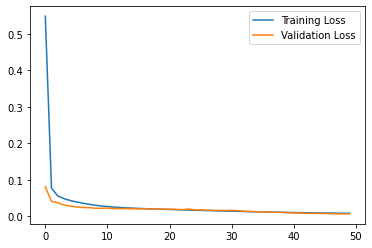

In [25]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

## Detecting anomalies

We will detect anomalies by determining how well our model can reconstruct the input data.

* Find MAE loss on training samples.
* Find max MAE loss value. This is the worst our model has performed trying to reconstruct a sample. We will make this the `threshold` for anomaly detection.
* If the reconstruction loss for a sample is greater than this `threshold` value then we can infer that the model is seeing a pattern that it isn't familiar with. We will label this sample as an `anomaly`.

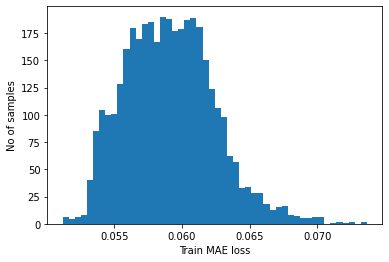

Reconstruction error threshold:  0.07364937245686706


In [26]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

## Compare reconstruction

Just for fun, let's see how our model has recontructed the first sample. This is the 288 timesteps from day 1 of our training dataset.

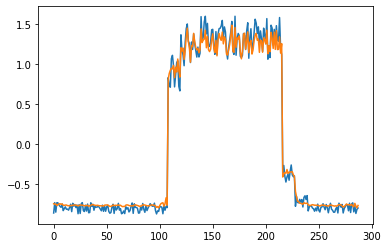

In [27]:
# Checking how the first sequence is learnt
plt.plot(x_train[0])
plt.plot(x_train_pred[0])
plt.show()

## Prepare testing data

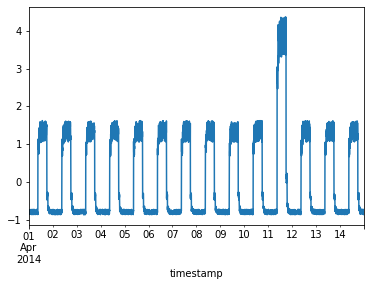

Test input shape:  (3745, 288, 1)


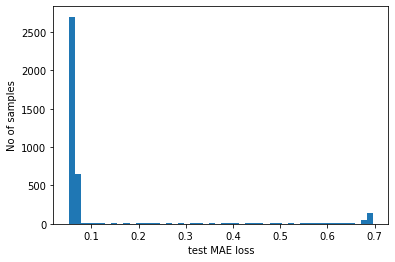

Number of anomaly samples:  407
Indices of anomaly samples:  (array([ 792,  793,  794,  795, 2521, 2523, 2697, 2698, 2699, 2701, 2702,
       2703, 2704, 2705, 2706, 2707, 2708, 2709, 2710, 2711, 2712, 2713,
       2714, 2715, 2716, 2717, 2718, 2719, 2720, 2721, 2722, 2723, 2724,
       2725, 2726, 2727, 2728, 2729, 2730, 2731, 2732, 2733, 2734, 2735,
       2736, 2737, 2738, 2739, 2740, 2741, 2742, 2743, 2744, 2745, 2746,
       2747, 2748, 2749, 2750, 2751, 2752, 2753, 2754, 2755, 2756, 2757,
       2758, 2759, 2760, 2761, 2762, 2763, 2764, 2765, 2766, 2767, 2768,
       2769, 2770, 2771, 2772, 2773, 2774, 2775, 2776, 2777, 2778, 2779,
       2780, 2781, 2782, 2783, 2784, 2785, 2786, 2787, 2788, 2789, 2790,
       2791, 2792, 2793, 2794, 2795, 2796, 2797, 2798, 2799, 2800, 2801,
       2802, 2803, 2804, 2805, 2806, 2807, 2808, 2809, 2810, 2811, 2812,
       2813, 2814, 2815, 2816, 2817, 2818, 2819, 2820, 2821, 2822, 2823,
       2824, 2825, 2826, 2827, 2828, 2829, 2830, 2831, 2832, 2

In [28]:
df_test_value = (df_daily_jumpsup - training_mean) / training_std
fig, ax = plt.subplots()
df_test_value.plot(legend=False, ax=ax)
plt.show()

# Create sequences from test values.
x_test = create_sequences(df_test_value.values)
print("Test input shape: ", x_test.shape)

# Get test MAE loss.
x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

## Plot anomalies
We now know the samples of the data which are anomalies. With this, we will find the corresponding timestamps from the original test data. We will be using the following method to do that:

Let's say time_steps = 3 and we have 10 training values. Our `x_train` will look like this:

* 0, 1, 2
* 1, 2, 3
* 2, 3, 4
* 3, 4, 5
* 4, 5, 6
* 5, 6, 7
* 6, 7, 8
* 7, 8, 9


All except the initial and the final `time_steps-1` data values, will appear in `time_steps` number of samples. So, if we know that the samples [(3, 4, 5), (4, 5, 6), (5, 6, 7)] are anomalies, we can say that the data point 5 is an anomaly.

In [29]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
anomalous_data_indices = []
for data_idx in range(TIME_STEPS - 1, len(df_test_value) - TIME_STEPS + 1):
    if np.all(anomalies[data_idx - TIME_STEPS + 1 : data_idx]):
        anomalous_data_indices.append(data_idx)

Let's overlay the anomalies on the original test data plot.

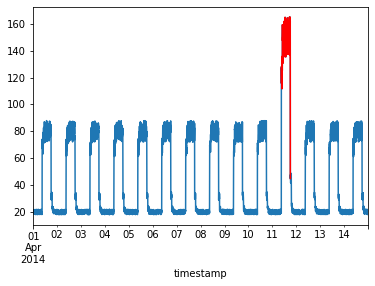

In [30]:
df_subset = df_daily_jumpsup.iloc[anomalous_data_indices]
fig, ax = plt.subplots()
df_daily_jumpsup.plot(legend=False, ax=ax)
df_subset.plot(legend=False, ax=ax, color="r")
plt.show()

# Acknowledgements 

While a great effort has been made to develop this tutorial notebook, it relies on materials prepared in [TensorFlow in Practice: Module 1](https://www.coursera.org/learn/introduction-tensorflow?specialization=tensorflow-in-practice) and [Keras Code Examples](https://keras.io/examples/vision/).

Happy learning! :D